# Exercise 2

Hi everyone, this exercise deals with file types and how to deal with them using Python. In particular, we show you how to work with

* Images
* Movies
* Tabular data
* Arbitrary data

In [42]:
# Plotting library matplotlib
import matplotlib.pyplot as plt

# Loading and saving images
import imageio as io

# OpenCV, a major computer vision library
import cv2 

url = 'https://www.fau.de/files/2019/07/Kollegienhaus_Malter_3-480x284.jpg' #jpg

#To remember from exercise 1: 
import numpy as np
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,11])
x[0::2] #-> slice from first (0) to last value (:), with a step of 2.
#x[0:-1:2] #-> slice from first (0) to last value without including it (-1), with a step of 2.

array([ 0,  2,  4,  6,  8, 11])

# Upload files to Google Colab:

At this point, you should upload the files we handled on the StudOn's folder. To do it, you can use the elements of the panel on the left side of Google Colab (If you can't find them, please look at the exercise slides).

# Matplotlib, ImageIO

Text(0.5, 1.0, 'ImageIO')

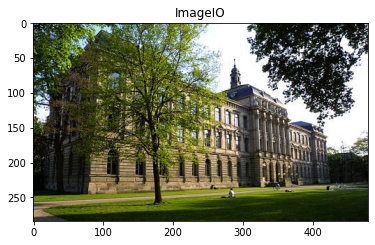

In [43]:
img_imageio = io.imread(url) # Reading an image using imageio
plt.imshow(img_imageio)
plt.title('ImageIO')

# OpenCV

With Opencv you can't read images from an url, you can either have it stored localy or use urllib.request



In [44]:
import urllib.request
urllib.request.urlretrieve(url, 'fau_im.png')#With this line, you can retrieve an image from an url
# Now you will find the image on the Google Colab's folder on the left side of the screen.

('fau_im.png', <http.client.HTTPMessage at 0x7fdcc9fbffd0>)

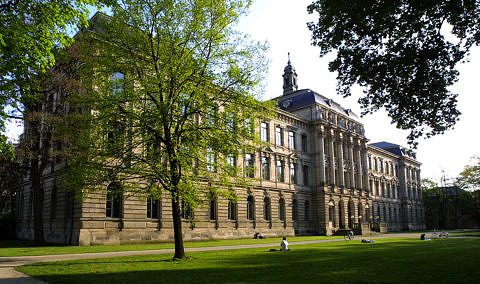

In [45]:
# to plot on google colab using openCV, we need:
from google.colab.patches import cv2_imshow

img_opencv = cv2.imread('fau_im.png')
cv2_imshow(img_opencv)


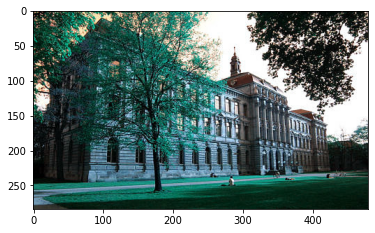

In [46]:
#one can also plot the OpenCV image with matplotlib using:
plt.imshow(img_opencv)

This looks weird, correct? There is something wrong with the **color**!

# Basic properties of an image

In [47]:
print('\nType of the image : ' , type(img_imageio))
print('\nShape of the image : ', img_imageio.shape)
print('\nWith height = {0}, whidth = {1}, and dimension = {2}. '.format(img_imageio.shape[0], 
                                                                        img_imageio.shape[1], 
                                                                        img_imageio.ndim))
print('\nSize of the image: {} bytes.'.format(img_imageio.size))


Type of the image :  <class 'imageio.core.util.Array'>

Shape of the image :  (284, 480, 3)

With height = 284, whidth = 480, and dimension = 3. 

Size of the image: 408960 bytes.


We can show 

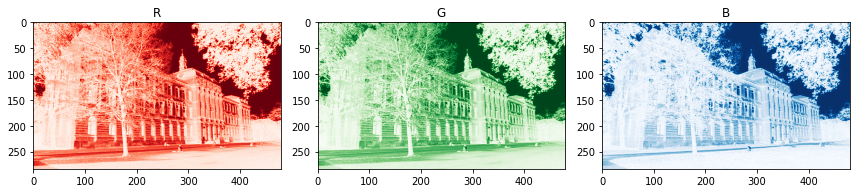

In [48]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1); plt.imshow(img_imageio[ :, :, 0], cmap='Reds', vmin=0, vmax=255); plt.title('R')
plt.subplot(1,3,2); plt.imshow(img_imageio[ :, :, 1], cmap='Greens', vmin=0, vmax=255); plt.title('G')
plt.subplot(1,3,3); plt.imshow(img_imageio[ :, :, 2], cmap='Blues', vmin=0, vmax=255); plt.title('B')
plt.tight_layout() 

There are three channels! We can compare the 3 channels from the image loaded with imageio to the 3 channels loaded with OpenCV. 

In [49]:
print(np.allclose(img_imageio[ :, :, 0], img_opencv[ :, :, 0]))
print(np.allclose(img_imageio[ :, :, 1], img_opencv[ :, :, 1]))
print(np.allclose(img_imageio[ :, :, 2], img_opencv[ :, :, 2]), '\n')

print(np.allclose(img_imageio[ :, :, 0], img_opencv[ :, :, 2]))# R
print(np.allclose(img_imageio[ :, :, 1], img_opencv[ :, :, 1]))# G
print(np.allclose(img_imageio[ :, :, 2], img_opencv[ :, :, 0]))# B

False
False
False 

True
False
True


## 1. To Do: Look in the internet to change the color space using OpenCV or try it on your own.

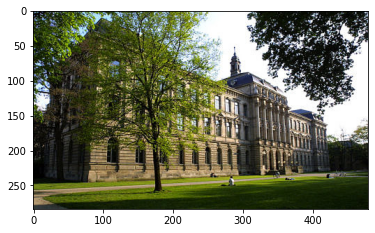

In [50]:
# Convert color using a single command
img_opencvrgb = cv2.cvtColor(img_opencv, cv2.COLOR_BGR2RGB)
plt.imshow(img_opencvrgb)

# Grayscale images

But how do we generate grayscale images? Can we just average all the channels?

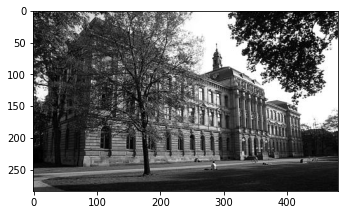

In [51]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(img_imageio.mean(2), cmap='gray')

No, this looks a little bit unnatural, because our perception is dominated by the green, a little bit occupied by red and contains almost no blue. We have to take a weighted average to generate a proper grayscale image, which is also known as [luminance channel](https://en.wikipedia.org/wiki/Grayscale)

In [52]:
# Y (luminance channel) = 0.2125 R + 0.7154 G + 0.0721 B
Y = img_imageio @ (0.2125, 0.7154, 0.0721)  # This is the dot product of (Y, X, 3) x (1, 1, 3) = (Y, X)

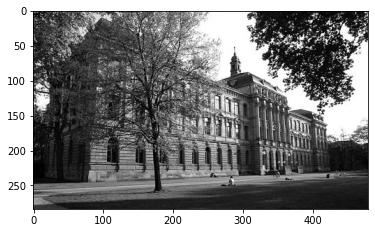

In [53]:
plt.imshow(Y, cmap='gray')

It is time to obtain an image from random data. You only have to specify that the numbers have to be between 0 and 256. 

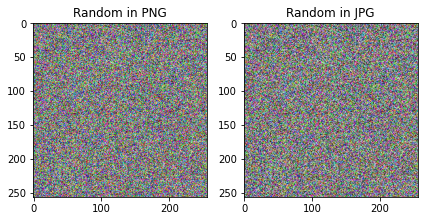

In [54]:
#creating an array of random data, with a size of 256x256 and 3 layers
r = np.random.randint(0, 256, (256,256,3)).astype(np.uint8)
io.imwrite("test.png", r)
io.imwrite("test.jpg", r)

png = io.imread("test.png")
jpg = io.imread("test.jpg")

plt.figure()
plt.subplot(1,2,1); plt.imshow(png); plt.title('Random in PNG')
plt.subplot(1,2,2); plt.imshow(jpg); plt.title('Random in JPG')
plt.tight_layout() 

And we can compare if the information is the same

In [55]:
print(np.allclose(r, png)) # THIS IS THE SAME IMAGE 
print(np.allclose(r, jpg)) # THIS IS **NOT** THE SAME IMAGE AS BEFORE!

True
False


But what about the noise that affects our images? We can measure it using the Peak signal-to-noise ratio, for example ([Wikipedia](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio)). Your task now is to compare two images using this theory. 

## 2. To Do: Read the PSNR ([useful link](https://www.ni.com/de-de/innovations/white-papers/11/peak-signal-to-noise-ratio-as-an-image-quality-metric.html)) and create the function psnr comparing two images, namely img1 and img2.

Note: be careful with the division by zero (hint: use conditionals)

In [56]:
def psnr(img1, img2):
  #mean squared error:
  mse = np.mean((img1 - img2) ** 2)
  if mse == 0:
      return 100
  PIXEL_MAX = 255.0
  return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

In [57]:
# If you use the images 'home.png' and 'home.jpg', the result should be around 43
img1 = io.imread('home.png')
img2 = io.imread('home.jpg') 
psnr(img1, img2)

43.448630415378354

For more info in general, you can visit: [Image manipulation and processing using Numpy and Scipy](https://scipy-lectures.org/advanced/image_processing/) 

# Video


Upload the video using mimread:

In [58]:
vid = io.mimread("sample_640x360.mp4", memtest=False)
type(vid) # Look which type of data is 'vid'

list

As 'vid' is a list, we want it to be a Numpy array, this way it is more convinient while working with images due to the performance that Numpy offers.
## 3. To Do:  Convert vid to numpy array and look at its shape

In [59]:
vid = np.asarray(vid)
vid.shape

(400, 360, 640, 3)

**What does each value obtained mean?**

**Your Answer:** 400 frames, height = 360, width = 640, 3 channels

---





We want to learn how to save images using ImageIo, for this purpose, we first need to check what are we going to save. 

## 4. To Do: Extract the first and last frames and plot them

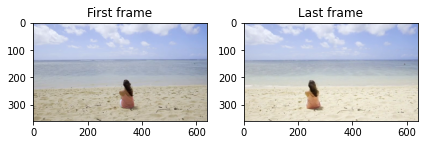

In [60]:
plt.figure()
plt.subplot(1,2,1); plt.imshow(vid[0]); plt.title('First frame')
plt.subplot(1,2,2); plt.imshow(vid[-1]); plt.title('Last frame')
plt.tight_layout() 

Another useful feature of ImageIo is saving video. Here we are going to use mimwrite to save a MP4 video from random data

In [61]:
random_data = np.random.randint(0, 255, (10,256, 256)).astype(np.uint8)
io.mimwrite("random.mp4", random_data)

Let's move to another file formats, but first, we  should clean a bit our folder using "!rm"


In [62]:
!rm fau_im.png test.png test.jpg home.jpg home.png sample_640x360.mp4 random.mp4 

# JSON files

JSON is a format for data representation, with the advantage to be lightweight and allows a simple read/write process. The data of this type of file is then represented by a name/value pair.

In [63]:
import json

How is the structure of a JSON file?

In [64]:
json_path = 'file.json'
with open(json_path, 'r') as f: # Opening json file
  data = json.load(f) # Loading the json file 
  

for i in data: 
  print(i) # Printing each element from data

{'ID': 220, 'Year': 2019, 'ArtistName': 'The Cure'}
{'ID': 221, 'Year': 2019, 'ArtistName': 'Def Leppard'}
{'ID': 222, 'Year': 2019, 'ArtistName': 'Janet Jackson'}
{'ID': 223, 'Year': 2019, 'ArtistName': 'Stevie Nicks'}
{'ID': 224, 'Year': 2019, 'ArtistName': 'Radiohead'}


Besides 'load' we have another very important function called 'dump'. With this function we can write json files.

In [65]:
json_data = {
    "University": "FAU",
    "Lecture": "DSSS",
    "Year":2021
}

with open('our_json.json', 'w') as f:
  json.dump(json_data, f)
  

Sometimes, you have to reset the read or write position. To do it, you can use the seek() method: 

**your_file.seek(0)** ,

which resets the file pointer.

Sometimes we want to add some information to the file, but how can we append this information?
## 5. To Do: Append your name to our_json.json

In [66]:
# 1. Creating the entry
name = {"Name": "your name"}

# 2. Opening the file
with open("our_json.json", "r+") as f:
  # 3. loading the object
  data = json.load(f)
  # 4. Appending name to data 
  data.update(name)
  # 5. Reseting the file pointer
  f.seek(0)
  # 6. Saving the data
  json.dump(data, f)

# CSV (Comma Separated Values) files

Another common file format is 'csv'. CSV files are more compact than JSON and need a separator character (usually a comma). This property allows the correct interpretation of the data that contains a CSV.

Lets check now the same data from our json stored in csv format:

In [67]:
import csv
with open('file.csv', 'r') as f:
  csvdata = f.readlines()
  f.close()
for i in csvdata:
  print(i)

ID,Year,ArtistName

220,2019,The Cure

221,2019,Def Leppard

222,2019,Janet Jackson

223,2019,Stevie Nicks

224,2019,Radiohead



But now we want to use this information for Data Science purposes and, for that reason, we are going to introduce Pandas. 

This package helps us loading, saving, visualizing and analyzing data; besides, it works with other libraries used in Data Science.

# Pandas:

One can obtain a [pandas](https://pandas.pydata.org/) data structure by reading a JSON or a CSV file

In [68]:
import pandas as pd
# From a json file 
data = pd.read_json('file.json')
print(data, '\n')

# From a csv file 
data_csv = pd.read_csv('file.csv')
print(data_csv)

    ID  Year     ArtistName
0  220  2019       The Cure
1  221  2019    Def Leppard
2  222  2019  Janet Jackson
3  223  2019   Stevie Nicks
4  224  2019      Radiohead 

    ID  Year     ArtistName
0  220  2019       The Cure
1  221  2019    Def Leppard
2  222  2019  Janet Jackson
3  223  2019   Stevie Nicks
4  224  2019      Radiohead


Now, which information do we have available on this dataset? You can obtain just the name of each column by writing:

In [69]:
print(data.columns)

Index(['ID', 'Year', 'ArtistName'], dtype='object')


and acces to a specific one using:

In [70]:
data[['ArtistName', 'Year']]

,ArtistName,Year
0,The Cure,2019
1,Def Leppard,2019
2,Janet Jackson,2019
3,Stevie Nicks,2019
4,Radiohead,2019


You can also get the rows by using integer-location (iloc) and use indexing to get a specific set of rows:

In [71]:
print(data.iloc[2:4])

    ID  Year     ArtistName
2  222  2019  Janet Jackson
3  223  2019   Stevie Nicks


## 6. To Do: change the ArtistName 'Def Leppard' to 'ACDC'.

Hint: use the function 'replace' (Pandas documentation for [DataFrame.replace ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html))

In [72]:
data['ArtistName'] = data['ArtistName'].replace(['Def Leppard'],'ACDC')
print(data)

    ID  Year     ArtistName
0  220  2019       The Cure
1  221  2019           ACDC
2  222  2019  Janet Jackson
3  223  2019   Stevie Nicks
4  224  2019      Radiohead


Good Pandas tutorial on [Youtube](https://www.youtube.com/watch?v=vmEHCJofslg).

# HDF5 container

Sometimes you need to store large amounts of data, e.g. microscopy, MRI, CT, ... together with meta data such that you have everything together and not spread across folders and files. A container format is [HDF5](), which is similar to a ZIP file, but way more useful. The library that makes it easy to use HDF5 files is for example [flammkuchen]().

In [73]:
!pip install flammkuchen
import flammkuchen as fl

In [74]:
# You can store almost arbitrary data organized in a dictionary:

d = {
    'tabular': pd.DataFrame(np.random.random((20,40))), # random tabular data
     'videos': np.random.randint(0, 256, (30, 256, 256, 3)).astype(np.uint8), # random video
     'json': dict(name='John Doe', age=32, gender="d") # random meta data
}

fl.save("my_hdf5_file.h5", d)

In [75]:
# Show the file contents:
fl.meta("my_hdf5_file.h5")

{'json': DictNode(age=ValueNode(type=<class 'numpy.int64'>), gender=ValueNode(type=<class 'numpy.str_'>), name=ValueNode(type=<class 'numpy.str_'>)),
 'tabular': PandasDataFrameNode((40, 20)),
 'videos': NumpyArrayNode(shape=(30, 256, 256, 3), dtype=uint8)}

In [76]:
the_video = fl.load("my_hdf5_file.h5", "/videos")
the_video.shape

(30, 256, 256, 3)

In [77]:
age = fl.load("my_hdf5_file.h5", "/json/age")
age

32

In [78]:
# And only a portion of the video, e.g. only the red channel of the first 5 frames
r_first_5_frames = fl.load("my_hdf5_file.h5", "/videos", sel=fl.aslice[:5, ..., 0])
r_first_5_frames.shape

(5, 256, 256)

Sources:
*   [link to file.json](https://mysafeinfo.com/api/data?list=rockrollinductees&format=json&case=default)
*   [link to home.png](https://pixabay.com/de/illustrations/kluge-arbeit-entspannen-heimat-6602781/)
*  [link to sample_640x360.mp4](https://filesamples.com/formats/mp4)

